## Two general tasks
-  identify the "natural" clustering number
-  properly group objects into "sensible" clusters

## Usage
-  Bank/Internet Security: fraud/spam pattern discovery
-  Biology: taxonomy of living things such as kingdom, phylum, class, order, family, genus and species
-  City-planning: Identifying groups of houses according to their house type, value, and geographical location
-  Climate change: understanding earth climate, find patterns of atmospheric and ocean
-  Finance: stock clustering analysis to uncover correlation underlying shares
-  Image Compression/segmentation: coherent pixels grouped
-  Information retrieval/organisation: Google search, topic-based news
-  Land use: Identification of areas of similar land use in an earth observation database
-  Marketing: Help marketers discover distinct groups in their customer bases, and then use this knowledge to develop targeted marketing programs
-  Social network mining: special interest group automatic discovery

## Distance Measures

In [1]:
import numpy as  np
import matplotlib.pyplot as plt 

In [2]:
data_matrix = np.array([[0, 2], [2, 0], [3, 1], [5, 1]], np.int32) # 3x2 matrix where col 0 = x, col 1 = y
num_data_points = data_matrix.shape[0]

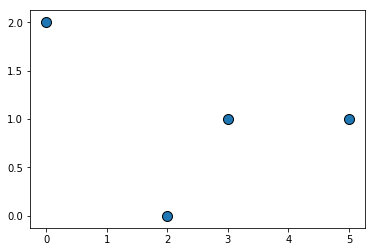

In [3]:
plt.scatter(data_matrix[:, 0], data_matrix[:, 1], marker='o', s=100, edgecolor='k')
plt.show()

## Minkowski distance

The Minkowski distance of order p between two points X and Y
![points x and y](pic1.svg)
is defined as:
![Minkowski distance formula](pic2.svg)

In [4]:
def minkowski_distance(p, data_matrix):
    num_rows, num_cols = data_matrix.shape
    num_examples = num_rows
    num_features = num_cols
    distance_matrix = np.zeros((num_rows, num_rows))
    
    for i in range(num_examples):
        point1 = data_matrix[i, :]
        for j in range(num_examples):
            point2 = data_matrix[j, :]
            distance = 0
            for f in range(num_features):
                distance += abs(point1[f] - point2[f]) ** p
            distance = distance ** (1/p)
            distance_matrix[i, j] = distance
    
    return distance_matrix

In [5]:
manhattan_distance_matrix = minkowski_distance(1, data_matrix) # L1 norm
euclidean_distance_matrix = minkowski_distance(2, data_matrix) # L2 norm 

In [6]:
manhattan_distance_matrix

array([[ 0.,  4.,  4.,  6.],
       [ 4.,  0.,  2.,  4.],
       [ 4.,  2.,  0.,  2.],
       [ 6.,  4.,  2.,  0.]])

In [7]:
euclidean_distance_matrix

array([[ 0.        ,  2.82842712,  3.16227766,  5.09901951],
       [ 2.82842712,  0.        ,  1.41421356,  3.16227766],
       [ 3.16227766,  1.41421356,  0.        ,  2.        ],
       [ 5.09901951,  3.16227766,  2.        ,  0.        ]])

## Cosine Similarity

![cosine similarity](pic3.svg)

In [8]:
def cosine_similarity(A, B):
    num_features = A.shape
    
    numerator = np.sum(np.multiply(A, B))
    denominator = np.sqrt(np.sum(np.power(A, 2))) * np.sqrt(np.sum(np.power(B, 2)))
    
    cos = numerator / denominator
    # closer to zero more similar are the examples 
    return 1 - cos

In [9]:
A = np.array([3, 2, 0, 5, 2, 0, 0])
B = np.array([1, 0, 0, 0, 1, 0, 2])

In [10]:
cosine_similarity(A, B)

0.68502960582564398

In [11]:
# very similar example
A = np.array([5, 7, 8, 1])
B = np.array([5, 7, 7, 1])

In [12]:
cosine_similarity(A, B)

0.0021780507643551772

In [13]:
# very dissimilar, orthogonal
A = np.array([0, 10])
B = np.array([10, 0])

In [14]:
cosine_similarity(A, B)

1.0

## Distance for Binary Features

![Binary Features Example](pic4.png)
-  Y and P will be set to 1, N set to 0
-  gender is a __symmetric__ feature e.g not important don't count it
-  the other features are __asymmetric__ binary

In [15]:
binary_features_data = np.array([[1, 0, 1, 0, 0, 0], [1, 0, 1, 0, 1, 0], [1, 1, 0, 0, 0, 0]])

In [16]:
binary_features_data

array([[1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 0]])

#### Contingency table
![Contigency table](pic6.png)
![Contigency table](pic5.png)


Notation: contigency_table[row, col]
- contigency_table[0, 0] - both Jack and Marry have Fever and positive Test-1
- contigency_table[0, 1] - no difference
- contigency_table[1, 0] - for Test-3 Mary has positive resulult but Jack has negative
- contigency_table[1, 1] - both Jack and Marry have negative Test-2, Test-4, Cough

##### __distance = r + s / q + r + s__ (distance closer to 0 means that they are similar)

distance(mary, jack) = 0 + 1/ 2 + 0 + 1 = 0.33

If there are more than 2 features then we can generalize as follows:
- __simple mis-matching__: distance = # of mis-matching features between x and y / total number of features
- __one-hot encodding__: then measure distance as normal
 

#### Partitioning Methodology
- Construct various partitions and then evaluate them by some criterion, 
  minimizing the sum of square distance cost
- Typical methods: __K-means__, K-medoids, CLARANS

#### Hierarchical Methodology
- Create a hierarchical decomposition of the set of data (or objects)
  using some criterion
- Typical methods: __Agglomerative__, Diana, Agnes, BIRCH, ROCK

#### Density-based Methodology
-  Based on connectivity and density functions
-  Typical methods: DBSACN, OPTICS, DenClue

#### Model-based Methodology
-  A generative model is hypothesized for each of the clusters and tries to 
   find the best fit of that model to each other
-  Typical methods: Gaussian Mixture Model (GMM), COBWEB

#### Spectral clustering Methodology
-  Convert data set into weighted graph (vertex, edge), then cut the graph into sub-graphs corresponding to clusters via spectral analysis
-  Typical methods: Normalised-Cuts 

#### Clustering ensemble Methodology
-  Combine multiple clustering results (different partitions)
-  Typical methods: __Evidence-accumulation based__, graph-based ……

## K-means Partitioning Clustering Approach

### Visualize Data

In [19]:
import random
from sklearn.datasets import make_blobs
from scipy.spatial import distance
plt.title("Three blobs", fontsize='small')
X, Y = make_blobs(n_features=2, centers=3) # not using labels - Y
plt.scatter(X[:, 0], X[:, 1], marker='o', s=50)

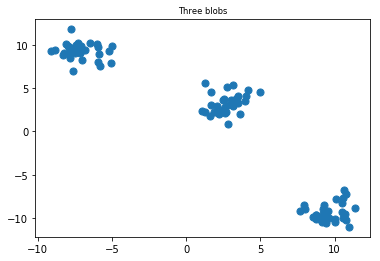

In [20]:
plt.show()

### Initialize centroids
Randomly pick K training examples, set Mu[0, :] ... M[k, :] equal to these K training examples 

In [21]:
def initialize_centroid(k, X):
    num_rows, num_cols = X.shape
    num_features = num_cols
    Mu = np.zeros((k, num_features))
    for i in range(k):
        Mu[i, :] = random.choice(X)
    return Mu

### K-Means

In [ ]:
def k_means(k, X):
    num_rows, num_cols = X.shape
    num_examples = num_rows
    num_features = num_cols
    
    C = np.zeros((num_rows, 1 + num_features)) # C[i] = the centroid number(index) (from 1 to K) 
                                               # closest to the examples X[i, :]
                                               # rest of the cols contain the example
    Mu = initialize_centroid(k, X)
    
    
    converged = False # if there is not movement of the centroids then the k-means has converged
    prev_Mu = Mu # used to check for convergence
    counter = 0
    while (not converged):
        for i in range(num_examples):
            min_distance = float('inf') # temporal variable to calculate the minimum distance to the centroid
            centroid_index = 0 # index to the centroid e.g class with the minimum distance
            for j in range(k):
                d = distance.euclidean(X[i, :], Mu[j, :]) # caculate euclidian
                if (d < min_distance):
                    min_distance = d
                    centroid_index = j
            C[i, 0] = centroid_index
            C[i, 1:] = X[i, :]
         
        for i in range(k):
            Xi = C[np.where(C[:, 0] == i)][:, 1:]
            num_examples, num_features = Xi.shape # number of example of that class
            Mu[i, :] = np.sum(Xi, axis=0) / num_examples
        
        
        counter += 1;
        if not (False in prev_Mu == Mu): # element wise checking
            converged = True
        prev_Mu = Mu
        

        

        
    return C, k_means_cost_function(C, Mu, k)

### 1 run of K Means

In [ ]:
min_cost = float("inf")
for i in range(10000):
    C, cost = k_means(3, X)
    if (min_cost > cost):
        min_cost = cost
        C_min = C
        
    


min_cost

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=C[:, 0], s=50)
plt.show()

We need a __cost function__ to evaluate how well is K Means performing
and then run K means several times and pick the one with the lowest cost
![Cost function](pic7.png)
This is also called __distortion function__

In other words, minimize the distance between examples of each class
Parameters
- C examples which belongs to a class
- Mu centroids

In [24]:
def k_means_cost_function(C, Mu, k):
    J = 0; # sum
    for i in range(k):
        Xi = C[np.where(C[:, 0] == i)][:, 1:]
        d = np.linalg.norm(Xi - Mu[i, :]) # computing the euclidian distance
        J += np.sum(d)
    return J

9.0

In [269]:
Xi[0, :]

array([-5.53841064, -7.49635724])

In [271]:
np.power((Xi - Mu[0, :]), 2)

array([[  54.12272597,  323.72555958],
       [  38.69156235,  360.24199201],
       [  26.69291527,  312.22806349],
       [  22.7763592 ,  289.23294327],
       [  55.10170947,  367.77454686],
       [  36.00002929,  367.2848481 ],
       [  34.72741735,  332.02248597],
       [  44.85998306,  377.07194244],
       [  50.59837401,  286.54155863],
       [  51.99107359,  301.23196615],
       [  40.56255618,  305.13833545],
       [  52.67465758,  290.27947758],
       [  48.37056367,  346.29073097],
       [  46.0388802 ,  355.27487032],
       [  37.43264794,  323.08056661],
       [  28.98700329,  286.28757101],
       [  14.33301158,  336.08271135],
       [  31.28640838,  327.22457241],
       [  18.90770761,  277.34548488],
       [  43.20121631,  242.99518361],
       [  34.46933241,  335.51520373],
       [  23.62338075,  356.65576058],
       [  42.04023232,  321.66123388],
       [  60.72296958,  359.22778475],
       [  49.27344949,  311.05026113],
       [  53.16054303,  3